In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

In [2]:
#Download bicyle data.
#!curl -o Fremont_Bridge_Bicycle_Counter.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=download

In [3]:
#Load data into a dataframe. Make the parsed date the index.
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates = True)

In [4]:
#View a snap-shot of the data.
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [5]:
#Rename columns.
data.columns = ['Total', 'West', 'East']

In [6]:
#View summary stats.
data.dropna().describe()

,Total,West,East
count,134849.000000,134849.000000,134849.000000
mean,113.115233,51.608940,61.506292
std,143.992450,66.405662,89.680806
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [7]:
##Visualize the data.

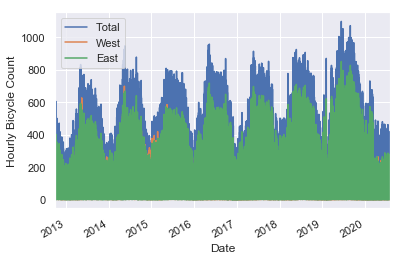

In [8]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

In [9]:
#Resample data by week. (Sum all of the hourly data into weekly units.)
weekly = data.resample('W').sum()

In [10]:
#View a snap-shot of the data.
weekly.head()

,Total,West,East
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0


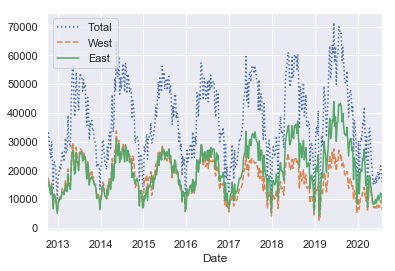

In [11]:
#Plot resampled data.
weekly.plot(style = [':', '--', '-'])

In [12]:
#Resample data by day. (Sum all of the hourly data into daily units.)
daily = data.resample('D').sum()

In [13]:
#View a snap-shot of the data.
daily.head()

,Total,West,East
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0


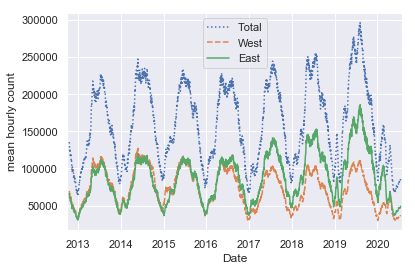

In [14]:
#Aggregate the data based on 30 day average; plot the data.
daily.rolling(30, center = True).sum().plot(style = [':', '--', '-'])
plt.ylabel('mean hourly count');

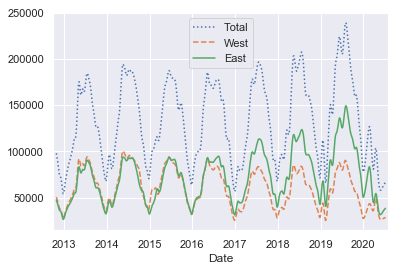

In [15]:
daily.rolling(50, center = True, win_type = 'gaussian').sum(std=10).plot(style = [':', '--', '-']);

In [16]:
##Examine how traffic changes on an hourly bases.

In [19]:
#Group data by time -- the mean value per hour.
by_time = data.groupby(data.index.time).mean()

In [26]:
#Examine the output.
by_time.head()

,Total,West,East
00:00:00,11.325267,4.804270,6.520996
01:00:00,5.998043,2.687367,3.310676
02:00:00,3.947387,1.894774,2.052613
03:00:00,2.907651,1.495730,1.411922
04:00:00,6.498754,3.446263,3.052491


In [27]:
#Create 6 ticks for the chart's x axis.  Each tick represents a 4 hour interval, begining with zero.
hourly_ticks = 4 * 60 * 60 * np.arange(6)

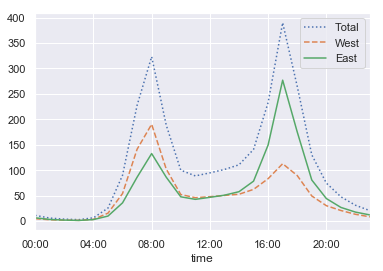

In [30]:
#Plot data data.
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])

In [31]:
##Examine how traffic changes on an hourly bases.

In [32]:
#Group data by day of the week (i.e., Monday, Tuesday, etc.) -- the mean value per day.
by_weekday = data.groupby(data.index.dayofweek).mean()

In [34]:
#Examine the output.
by_weekday

,Total,West,East
Date,,,
0,132.196176,58.726829,73.469347
1,140.684473,62.781750,77.902723
2,139.653444,62.349715,77.303729
3,132.893035,59.720253,73.172782
4,120.148121,53.910577,66.237544
5,63.932357,32.096478,31.835879
6,62.128204,31.608578,30.519626


In [36]:
#Provide new labels for the indices...make days of the week.
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

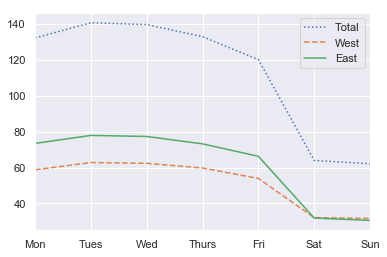

In [37]:
#Plot data data.
by_weekday.plot(style = [':', '--', '-'])

In [38]:
##Compare hourly data on weekends -vs- weekdays 

In [39]:
#Create an index that identifies weekdays and weekends based on our data set's index (time).
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

In [42]:
#Use groupby to split the data set into hourly data for weekends and hourly data for weekdays.
by_time = data.groupby([weekend, data.index.time]).mean()

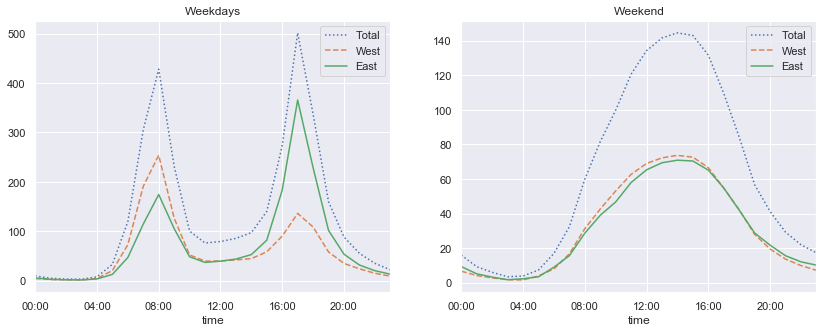

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.loc['Weekday'].plot(ax =ax[0], title = 'Weekdays',
                          xticks = hourly_ticks, style = [':', '--', '-'])
by_time.loc['Weekend'].plot(ax =ax[1], title = 'Weekend',
                          xticks = hourly_ticks, style = [':', '--', '-'])